In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

2024-03-27 14:36:34.513353: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


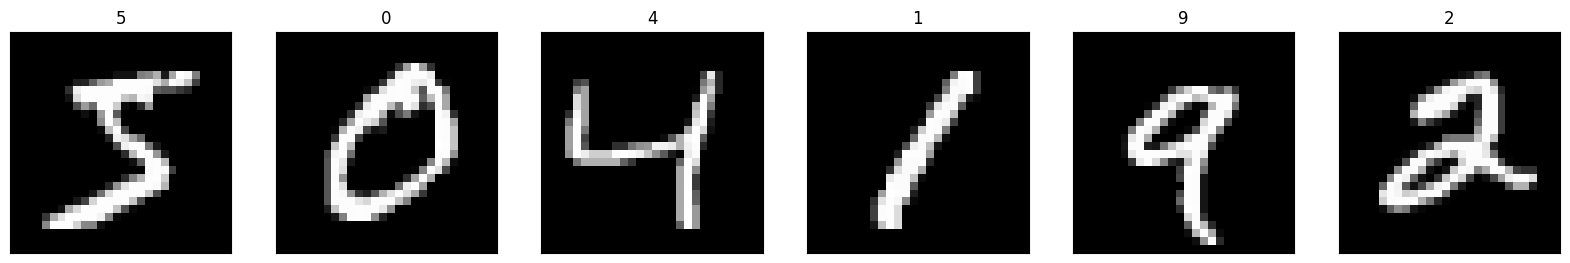

In [2]:
fig = plt.figure(figsize=(20, 20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

In [3]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [4]:
num_classes = 10
print("Integer-valued labels:")
print(y_train[:10])

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("One-hot labels:")
print(y_train[:10])

print(X_train.shape)
print(X_train[0].shape)
print(type(X_train))

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(60000, 28, 28)
(28, 28)
<class 'numpy.ndarray'>


In [5]:
img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

print(X_train.shape)
print(X_train[0].shape)
print(type(X_train))

(60000, 28, 28, 1)
(28, 28, 1)
<class 'numpy.ndarray'>


In [6]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-03-27 14:36:37.014983: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-27 14:36:37.020863: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-27 14:36:37.021036: I external

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5.keras', verbose=1,
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=10, epochs=12,
                 validation_data=(X_test, y_test), callbacks=[checkpointer],
                 verbose=2, shuffle=True)

Epoch 1/12


I0000 00:00:1711550198.179060   46413 service.cc:145] XLA service 0x71c3b0005960 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1711550198.179089   46413 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2024-03-27 14:36:38.202131: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-27 14:36:38.287960: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1711550199.134185   46413 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 1: val_loss improved from inf to 0.04454, saving model to model.weights.best.hdf5.keras
6000/6000 - 10s - 2ms/step - accuracy: 0.9667 - loss: 0.1062 - val_accuracy: 0.9856 - val_loss: 0.0445
Epoch 2/12

Epoch 2: val_loss improved from 0.04454 to 0.03393, saving model to model.weights.best.hdf5.keras
6000/6000 - 8s - 1ms/step - accuracy: 0.9873 - loss: 0.0446 - val_accuracy: 0.9896 - val_loss: 0.0339
Epoch 3/12

Epoch 3: val_loss improved from 0.03393 to 0.02881, saving model to model.weights.best.hdf5.keras
6000/6000 - 8s - 1ms/step - accuracy: 0.9905 - loss: 0.0351 - val_accuracy: 0.9905 - val_loss: 0.0288
Epoch 4/12

Epoch 4: val_loss did not improve from 0.02881
6000/6000 - 8s - 1ms/step - accuracy: 0.9920 - loss: 0.0300 - val_accuracy: 0.9907 - val_loss: 0.0314
Epoch 5/12

Epoch 5: val_loss did not improve from 0.02881
6000/6000 - 9s - 1ms/step - accuracy: 0.9938 - loss: 0.0253 - val_accuracy: 0.9900 - val_loss: 0.0373
Epoch 6/12

Epoch 6: val_loss did not improve from 0.028

In [8]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 99.0100%
